<a href="https://colab.research.google.com/github/superbunny38/2021DataScience/blob/main/8_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/joelgrus/data-science-from-scratch.git book

Cloning into 'book'...
remote: Enumerating objects: 392, done.
remote: Total 392 (delta 0), reused 0 (delta 0), pack-reused 392
Receiving objects: 100% (392/392), 769.61 KiB | 3.15 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [4]:
%pwd

'/content'

In [5]:
!mkdir workspace

In [6]:
!mv /content/book/scratch workspace

In [7]:
%cd workspace

/content/workspace


In [8]:
from scratch.linear_algebra import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

In [30]:
from typing import Callable
#미분값
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h


In [31]:
def square(x: float) -> float:
    return x * x


In [32]:
def derivative(x: float) -> float:#도함수
    return 2 * x

In [33]:
xs = range(-10,11)
actuals = [derivative(x) for x in xs]#실제 미분값
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]#미분값 예측치

In [34]:
graph = [square(x) for x in xs]

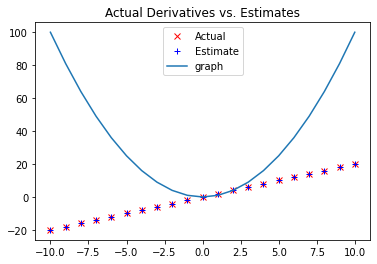

In [35]:
#두 계싼식의 결과값이 거의 비슷함을 보여주기 위한 그래프
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label = 'Actual')
plt.plot(xs, estimates, 'b+', label = 'Estimate')
plt.plot(xs, graph, label = 'graph')
plt.legend(loc =9)
plt.show()

다른 것도 해봐야징

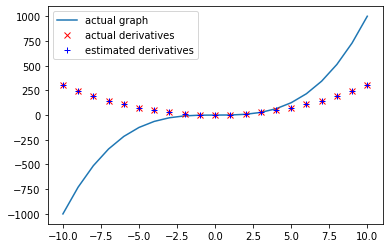

In [38]:
def f(x)->float:
  return x**3
actual_graph = [x**3 for x in xs]#실제 그래프
actuals = [3*(x**2) for x in xs]#실제 미분값
estimates = [difference_quotient(f, x, h = 0.001) for x in xs]#미분값 예측치
plt.plot(xs,actual_graph,label="actual graph")
plt.plot(xs,actuals,'rx',label="actual derivatives")
plt.plot(xs, estimates, 'b+',label = 'estimated derivatives')
plt.legend()
plt.show()

In [39]:
#f(x)의 변화량을 알려주는 편도함수
def partial_difference_quotient(f: Callable[[Vector],float],
                                v: Vector,
                                i: int,
                                h:float)->float:
                                w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
                                return (f(w)-f(v))/h

In [40]:
#그래디언트의 근사값
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

## 그래디언트 적용하기

sum_of_squares가 v가 0일 때 최솟값인걸 모른다고 가정하고 그래디언트로 구해보기

In [41]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

In [42]:
def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [43]:
#임의의 시작점을 선택
v = [random.uniform(-10,10) for i in range(3)]

for epoch in range(1000):
  grad = sum_of_squares_gradient(v)#v의 그래디언트 계산
  v = gradient_step(v, grad, -0.01)#그래디언트의 음수만큼(반대로) 이동
  print(epoch, v)

0 [-1.0118073478512934, 2.3402118764034454, 4.9752679409651455]
1 [-0.9915712008942675, 2.2934076388753764, 4.875762582145843]
2 [-0.9717397768763821, 2.247539486097869, 4.778247330502926]
3 [-0.9523049813388544, 2.2025886963759116, 4.6826823838928675]
4 [-0.9332588817120774, 2.1585369224483935, 4.58902873621501]
5 [-0.9145937040778358, 2.1153661839994258, 4.49724816149071]
6 [-0.896301829996279, 2.073058860319437, 4.4073031982608954]
7 [-0.8783757933963535, 2.0315976831130484, 4.319157134295677]
8 [-0.8608082775284265, 1.9909657294507874, 4.232773991609764]
9 [-0.843592111977858, 1.9511464148617716, 4.148118511777569]
10 [-0.8267202697383008, 1.9121234865645362, 4.065156141542017]
11 [-0.8101858643435348, 1.8738810168332456, 3.983853018711177]
12 [-0.7939821470566641, 1.8364033964965807, 3.9041759583369533]
13 [-0.7781025041155308, 1.7996753285666491, 3.826092439170214]
14 [-0.7625404540332202, 1.763681821995316, 3.74957059038681]
15 [-0.7472896449525558, 1.7284081855554099, 3.6745791

In [44]:
v

[-1.7375905492091593e-09, 4.018877751996007e-09, 8.544095446987144e-09]

In [46]:
distance(v, [0,0,0])<0.01#최소화하기 위해 0,0,0 가깝게 옴

True

### 경사하강법으로 손실을 최소화하는 모델의 파라미터를 구할 수 있다

$y = 20x + 5$

In [48]:
#한개의 데이터 포인트에서 오차의 그래디언트를 계산해 주는 함수
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad


경사하강법 적용 순서:
1. 임의의 theta로 시작
2. 모든 그래디언트의 평균을 계산
3. theta를 2번에서 계산된 값으로 변경
4. 반복

In [59]:
from scratch.linear_algebra import vector_mean

#임의의 경사와 절편으로 시작
theta = [random.uniform(-1,1), random.uniform(-1,1)]#임의의 theta
learning_rate = 0.001#학습률

In [60]:
for epoch in range(5000):#반복
  #모든 그래디언트의 평균을 계산
  grad = vector_mean([linear_gradient(x,y,theta) for x,y in inputs])#그래디언트 평균
  #그래디언트 만큼 이동
  theta = gradient_step(theta, grad, -learning_rate)#왜 학습률 음수로 했대?
  if epoch %1000 ==0:
    print(epoch, theta)

0 [33.73303338350392, 0.16532357906230313]
1000 [19.999608245530386, 4.347728572806656]
2000 [19.99994705601734, 4.911848237073319]
3000 [19.999992844841557, 4.98808665689908]
4000 [19.99999903301018, 4.998389961367437]


In [61]:
slope, intercept = theta
print("{}x+{}".format(slope, intercept))

19.999999869053543x+4.999781974072964


#### 미니배치와 SGD
: 전체 데이터셋의 샘플인 미니배치에서 그래디언트를 계산

In [62]:

from typing import TypeVar, List, Iterator

#변수의 타입과 무관한 함수를 생성
T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]


In [65]:
theta = [random.uniform(-1,1), random.uniform(-1,1)]#임의의 theta
theta

[-0.28523763389888335, 0.8365146348437797]

미니배치 경사하강법

In [66]:
for epoch in range(1000):
  for batch in minibatches(inputs, batch_size= 20):
    grad = vector_mean([linear_gradient(x,y,theta) for x, y in batch])
    theta = gradient_step(theta, grad, -learning_rate)
  if epoch%100 == 0:
    print(epoch, theta)

0 [18.231065824143062, 0.5987680103633475]
100 [20.001043688222993, 3.5455574270862065]
200 [19.930394022267627, 4.6083643978336895]
300 [19.9874251118762, 4.919787575705816]
400 [19.999035394138264, 4.969108773741503]
500 [19.999652198641066, 4.992185931337472]
600 [20.00006298047021, 4.998554431523136]
700 [19.999995889918804, 4.999581310885074]
800 [20.000002790027576, 4.9999271727368395]
900 [19.999999150119162, 4.999979509906665]


In [67]:
slope2, intercept2 = theta

In [68]:
slope2>slope

True

In [69]:
intercept2 > intercept

True

SGD, 단 하나의 데이터포인트에서 그래디언트 계산

In [70]:
theta = [random.uniform(-1,1), random.uniform(-1,1)]#임의의 theta
theta

[-0.5749355297616712, -0.7655298029552682]

In [71]:
for epoch in range(100):
  for x,y in inputs:
    grad = linear_gradient(x,y,theta)
    theta = gradient_step(theta, grad, -learning_rate)
  if(epoch%10 == 0):
    print(epoch, theta)

0 [20.11868356759501, -0.9071341812977282]
10 [20.076549811696964, 1.1899302816442505]
20 [20.049374217653998, 2.5425255550555295]
30 [20.031846094287417, 3.4149422203815876]
40 [20.02054056536792, 3.97764626999229]
50 [20.01324856822116, 4.340587352773]
60 [20.00854524782739, 4.5746823944200985]
70 [20.00551163630526, 4.725672435206161]
80 [20.0035549657054, 4.823060198890772]
90 [20.00229294132536, 4.885874780103076]


In [72]:
slope3, intercept3 = theta

In [74]:
slope3 >slope2

True

In [75]:
intercept3 > intercept3

False

In [76]:
slope3

20.001545241744015

In [77]:
intercept2

4.999994762234289

SGD: 빠르지만 하나의 데이터포인트가 전체 방향과 상반될 수 있다는 단점


minibatch: 느리지만 전체 방향을 더 고려 가능